In [1]:
html.eval('''<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>''')

<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>

In [2]:
html.eval('''<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>''')

<h1 style="text-align: left;">Aufgabe: 1a und 1b</h1>

Anzahl der Iterationen >> 5


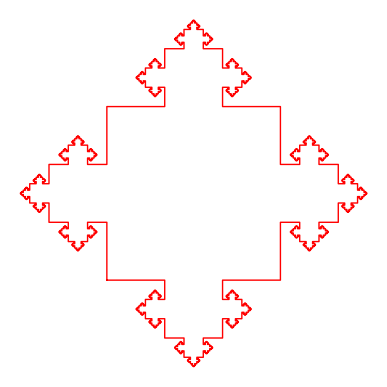

Umfang (in LE) 17.333


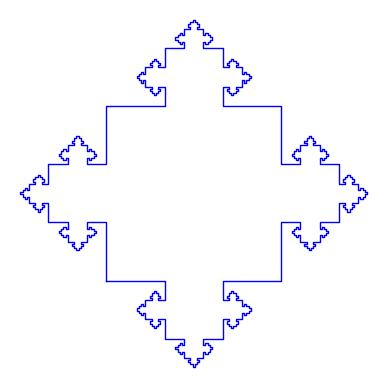

Umfang (in LE) 14.667


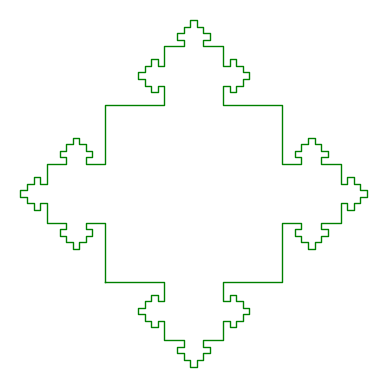

Umfang (in LE) 12.000


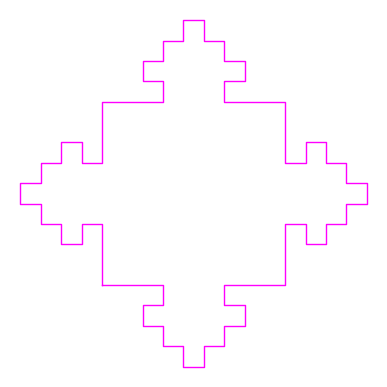

Umfang (in LE) 9.3333


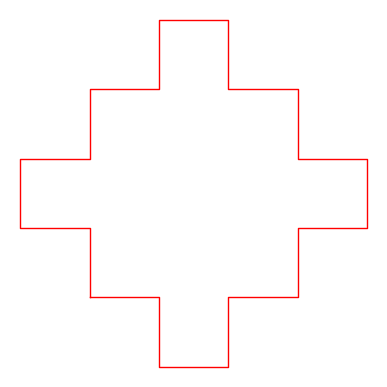

Umfang (in LE) 6.6667


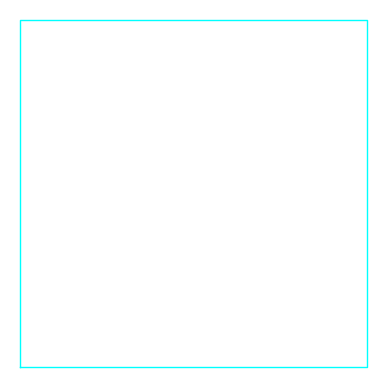

Umfang (in LE) 4.0000


In [8]:
colors = ['red', 'green', 'blue', 'magenta', 'cyan']

def onethird (x,y):
    return(list((vector(y) - vector(x))/3 + vector(x)))

def twothird (x,y):
    return(list((vector(y) - vector(x)) * 2/3 + vector(x)))

def top (x,y):
    return[rotate(twothird(x,y),pi/2,onethird(x,y)),rotate(onethird(x,y),-pi/2,twothird(x,y))]

def rotate(pkt,alpha,Z):
    tmp = vector(pkt)-vector(Z)
    rotationsmatrix = Matrix([
        [cos(alpha), -sin(alpha)],
        [sin(alpha), cos(alpha)]])
    return list((rotationsmatrix*tmp)+vector(Z))

def wachstum(x,y):
    '''
    Methode die den Wachstum von einem Iterationsschritt zu einem neuen brechnet
    '''
    return [x,onethird(x,y)] + top(x,y) + [twothird(x,y),y]

def quadratKochCurve(x,y,iterations):
    '''
    Methode die sich rekursive aufruft und immer 
    '''
    g = wachstum(x,y)
    if (iterations == 0): return [x,y]
    elif (iterations == 1): return g
    else:
        return (quadratKochCurve(g[0],g[1],0) + 
                quadratKochCurve(g[1],g[2],iterations-1) + 
                quadratKochCurve(g[2],g[3],iterations-1) + 
                quadratKochCurve(g[3],g[4],iterations-1) +
                quadratKochCurve(g[4],g[5],0))


def umfang(iterations):
    '''
    Methode die den Umfang berechnet mit der Formel der geometrischen Reihe
    '''
    print ("Umfang (in LE) " + str((4+(8/3*iterations)).n(digits=5)))

def printer(iterations):
    '''
    Zuerst wird ein Grafikobjekt erzeugt das im anschluss mit line eine set von punkten
    bekommt. Hierbei wir für jede Richtung (Norden, Osten, Süden, Westen) unseres Ausgangsquadrates
    die quadratKochCurve methode aufgerufen die die Punkte zurückgibt die gelaufen (von line) werden müssen.
    '''
    Graphic = Graphics()
    Graphic = Graphic + line(quadratKochCurve([0,0],[0,1],iterations) + 
                             quadratKochCurve([0,1],[1,1],iterations) + 
                             quadratKochCurve([1,1],[1,0],iterations) + 
                             quadratKochCurve([1,0],[0,0],iterations), color=randomColor())
    show(Graphic , aspect_ratio=1, axes=False) # Ausgabe der Grafik bei jedem Rekursionsschritt
    umfang(iterations) # Ausgabe des Umfangs bei jedem Rekusionsschritt
    
def randomColor():
    '''
    Method to return a random color
    '''
    return colors[randint(0, len(colors)-1)]    

def caller(iterations):
    '''
    Methode die den Printer aufruft und sich dann wieder Rekursive selbst aufruft um jeden schritt zu plotten
    '''
    if(iterations == -1): return
    printer(iterations)
    caller(iterations-1)

if __name__ == "__main__":
    '''
    Main Methode als Einstiegspunkt des Programms
    '''
    iterations = int(input("Anzahl der Iterationen >> "))
    caller(iterations)

In [6]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1c</h1>''')

<h1 style="text-align: left;">Aufgabe 1c</h1>

Anzahl der Iterationen >> 5


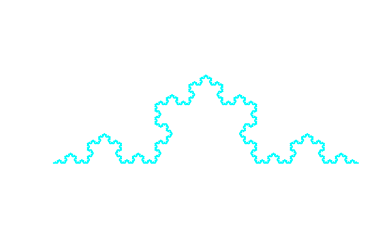

Umfang (in LE): 4.2140


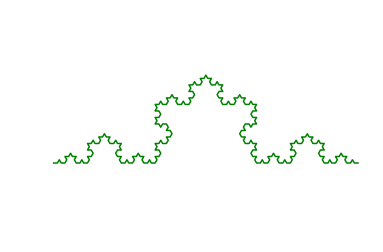

Umfang (in LE): 3.1605


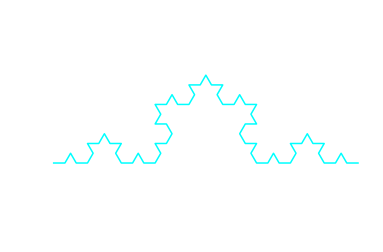

Umfang (in LE): 2.3704


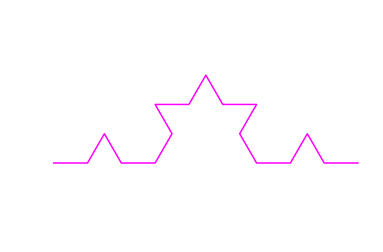

Umfang (in LE): 1.7778


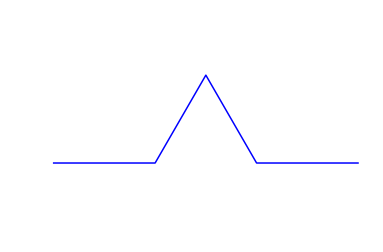

Umfang (in LE): 1.3333


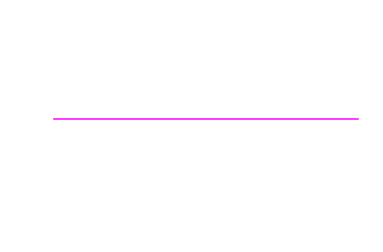

Umfang (in LE): 1.0000


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor

colors = ['red', 'green', 'blue', 'magenta', 'cyan']
    
def snowflake(iterationsschritte):
        if iterationsschritte == -1: return
        n_lines = 4**iterationsschritte
        h = 3**(-iterationsschritte);
        x = [0]*(n_lines+1)
        y = [0]*(n_lines+1)
        x[0], y[0] = 0, 0
        segment=[0] * n_lines;
        angle=[0, np.pi/3, -np.pi/3, 0]   
        for i in range(n_lines):
            m=i
            ang=0
            for j in range(iterationsschritte):
                segment[j] = np.mod(m, 4)
                m = floor(m / 4)
                ang = ang + angle[int(segment[j])]
            x[i+1] = x[i] + h*np.cos(ang)
            y[i+1] = y[i] + h*np.sin(ang)
        plotter(x,y) # Grafische Aufbereitung 
        umfang(iterationsschritte) # Berechnung des Umfangs 
        snowflake(iterationsschritte - 1) # Rekursiver Aufruf der Schneeflocke
    
    
def randomColor():
    '''
    Method to return a random color
    '''
    return colors[randint(0, len(colors)-1)]

def umfang(n):
    print("Umfang (in LE): " + str(((4/3)^n).n(digits=5)))

def plotter(x,y):
    '''
    Plottermethod
    '''
    plt.plot(x, y, color=randomColor())
    plt.axis('off')
    plt.axes().set_aspect('equal', 'datalim')
    plt.show()
    
if __name__ == "__main__":
    iterationsschritte = int(input("Anzahl der Iterationen >> "))
    snowflake(iterationsschritte)

